In [12]:
import numpy as np
import math
import matplotlib



file_x_test = np.loadtxt('X_test.csv')
file_y_test = np.loadtxt('Y_test.csv')
file_x_train = np.loadtxt('X_train.csv')
file_y_train = np.loadtxt('Y_train.csv')

print(file_x_test.shape)
print(file_y_test.shape)
print(file_x_train.shape)
print(file_y_train.shape)

file_y_test = file_y_test.reshape(50,1)
file_y_train = file_y_train.reshape(100,1)
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


def softmax(x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps,axis=0)

# initializing the variables
epoch=10000 # number of training iterations
inputlayer_neurons = file_x_train.shape[1] # number of features in data set
print(file_x_train.shape[1])
hiddenlayer_neurons = 10 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight and bias


# training the model
def model(input_data,output_data,lr):
    
    wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))*np.sqrt(1./hiddenlayer_neurons)
    bh=np.random.uniform(size=(1,hiddenlayer_neurons))
    wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))*np.sqrt(1./output_neurons)
    bout=np.random.uniform(size=(1,output_neurons))
    for i in range(epoch):

        #Forward Propogation
        hidden_layer_input1=np.dot(input_data,wh)
        hidden_layer_input=hidden_layer_input1 + bh
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wout)
        output_layer_input= output_layer_input1+ bout
        output = softmax(output_layer_input)

        #Backpropagation
        E = output_data-output
        slope_output_layer = softmax(output, derivative=True)
        slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        d_output = E * slope_output_layer
        Error_at_hidden_layer = d_output.dot(wout.T)
        d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
        wout += hiddenlayer_activations.T.dot(d_output) *lr
        bout += np.sum(d_output, axis=0,keepdims=True) *lr
        wh += input_data.T.dot(d_hiddenlayer) *lr
        bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

    return wh,bh,wout,bout

final_weights, final_bias, final_weights2,final_bas2= model(file_x_train,file_y_train,0.001)
# model(file_x_test,file_y_test,lr=0.001)

def predict(input_data, wh,bh,wh2,bh2):
    for i in range(epoch):

        #Forward Propogation
        hidden_layer_input1=np.dot(input_data,wh)
        hidden_layer_input=hidden_layer_input1 + bh
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wh2)
        output_layer_input= output_layer_input1+ bh2
        output = softmax(output_layer_input)
    return output

predicted_output = predict(file_x_test, final_weights, final_bias,final_weights2,final_bas2)
print(predicted_output.shape)
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred,2))

print(mse(file_y_test,predicted_output))

def compute_accuracy(x_val, y_val,wh,bh,bh2,wh2):
    predictions = []
    output = predict(x_val,wh,bh,wh2,bh2)
    for x, y in zip(output, y_val):
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))
    return np.mean(predictions)

print("Accuracy",compute_accuracy(file_x_test,file_y_test,final_weights,final_bias,final_bas2,final_weights2))

(50, 2)
(50,)
(100, 2)
(100,)
2
(50, 1)
5637.863550197509
Accuracy 0.0


0.011 0.0
0.020999999999999998 0.0
0.031 0.0
0.041 0.0
0.051000000000000004 0.0
0.061000000000000006 0.0
0.07100000000000001 0.0
0.081 0.0
0.091 0.0
0.10099999999999999 0.0
0.11099999999999999 0.0
0.12099999999999998 0.0
0.13099999999999998 0.0
0.141 0.0
0.151 0.0
0.161 0.0
0.171 0.0
0.18100000000000002 0.0
0.19100000000000003 0.0
0.20100000000000004 0.0
0.21100000000000005 0.0
0.22100000000000006 0.0
0.23100000000000007 0.0
0.24100000000000008 0.0
0.25100000000000006 0.0
0.26100000000000007 0.0
0.2710000000000001 0.0
0.2810000000000001 0.0
0.2910000000000001 0.0
0.3010000000000001 0.0
0.3110000000000001 0.0
0.3210000000000001 0.0
0.3310000000000001 0.0
0.34100000000000014 0.0
0.35100000000000015 0.0
0.36100000000000015 0.0
0.37100000000000016 0.0
0.38100000000000017 0.0
0.3910000000000002 0.0
0.4010000000000002 0.0
0.4110000000000002 0.0
0.4210000000000002 0.0
0.4310000000000002 0.0
0.4410000000000002 0.0
0.45100000000000023 0.0
0.46100000000000024 0.0
0.47100000000000025 0.0
0.481000

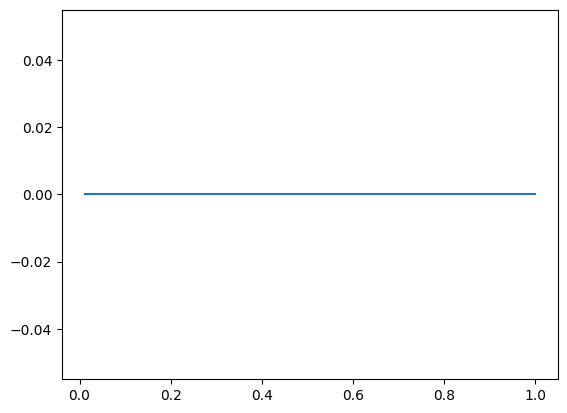

In [16]:
x = 0.001
accu = []
lrs = []
while x < 1.0 :
    x = x + 0.010
    final_weights, final_bias, final_weights2,final_bas2= model(file_x_train,file_y_train,0.001)
    predicted_output = predict(file_x_test, final_weights, final_bias,final_weights2,final_bas2)
    pert = compute_accuracy(file_x_test,file_y_test,final_weights,final_bias,final_bas2,final_weights2)
    accu.append(pert)
    lrs.append(x)
    print(x,pert)

import matplotlib.pyplot as plt
plt.plot(lrs,accu)    

In [ ]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

In [ ]:
def relu(x):
    return np.maximum(0,x)
    